## LDA (linear discriminant analysis) 개요
- pca와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만 __지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준__ 을 최대한 유지하면서 차원을 축소한다는 점이 큰 차이

- pca: 입력 데이터의 변동성의 가장 큰 축을 찾기
- lda: 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축 찾기

### 차원 축소 방법
- 클래스 간 분산과 클래스 내부 분산의 비율을 최대화 하는 방식으로 차원 축소
> 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식 

###  LDA 구하는 스텝 
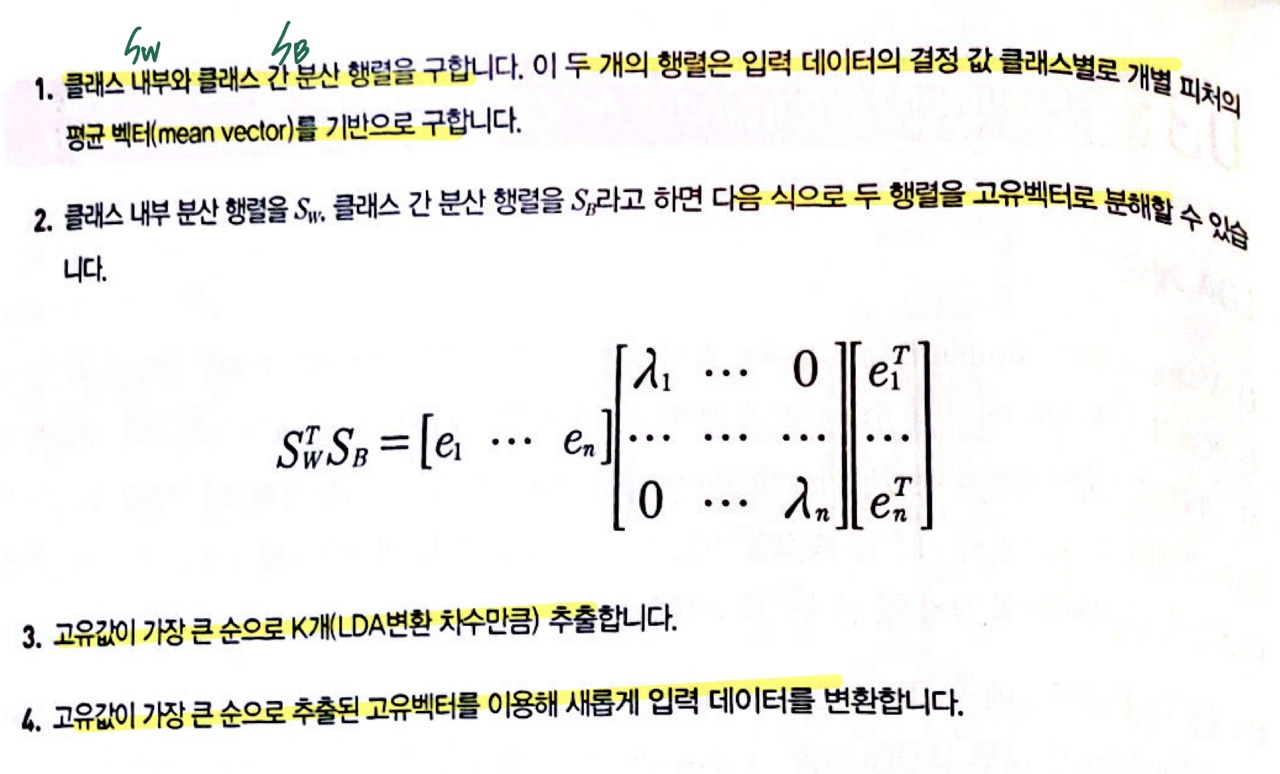

### 붓꽃 데이터 셋에 LDA 적용하기 

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


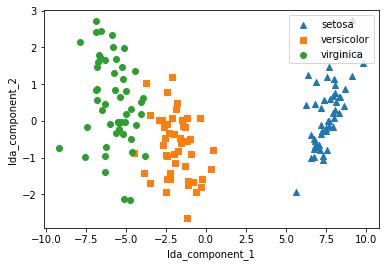

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()
